In [1]:
from fastai import *
from fastai.vision import *
import numpy as np

In [2]:
path = Path('./data/')

In [3]:
classes = ['catasetum', 'cattleya', 'dendrobium', 'phalaenopsis', 'vanda']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [4]:
test_path = Path("./test")

In [5]:
imgs = [img for img in test_path.iterdir() if img.is_file()]

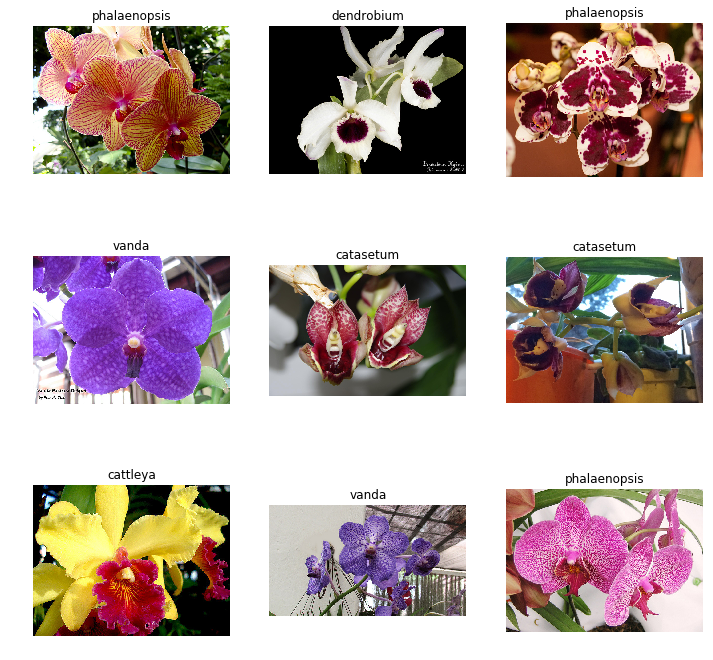

In [6]:
fig,axes = plt.subplots(3,3, figsize= (12,12))
for i, img in enumerate(np.random.permutation(imgs)[:9]):
    img = open_image(img)
    pred_class,pred_idx,outputs = learn.predict(img)
    img.show(ax=axes.flat[i], title=
        f'{pred_class}')